In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 33s 6ms/step - loss: 0.3547 - accuracy: 0.8946 - val_loss: 0.0818 - val_accuracy: 0.9790
Epoch 2/15
422/422 [==============================] - 2s 6ms/step - loss: 0.1104 - accuracy: 0.9657 - val_loss: 0.0566 - val_accuracy: 0.9853
Epoch 3/15
422/422 [==============================] - 2s 6ms/step - loss: 0.0804 - accuracy: 0.9747 - val_loss: 0.0432 - val_accuracy: 0.9895
Epoch 4/15
422/422 [==============================] - 2s 6ms/step - loss: 0.0653 - accuracy: 0.9800 - val_loss: 0.0504 - val_accuracy: 0.9860
Epoch 5/15
422/422 [==============================] - 2s 6ms/step - loss: 0.0606 - accuracy: 0.9814 - val_loss: 0.0374 - val_accuracy: 0.9908
Epoch 6/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0529 - accuracy: 0.9832 - val_loss: 0.0396 - val_accuracy: 0.9885
Epoch 7/15
422/422 [==============================] - 2s 6ms/step - loss: 0.0483 - accuracy: 0.9850 - val_loss: 0.0345 - val_accuracy: 0.9912
Epoch

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.025119386613368988
Test accuracy: 0.9919999837875366


In [ ]:
from keras.models import Model

In [ ]:
layer_outputs = [layer.output for layer in model.layers[0:4]]
activation_model = Model(inputs=model.input,outputs=layer_outputs)

In [ ]:
import matplotlib.pyplot as plt

(-0.5, 27.5, 27.5, -0.5)

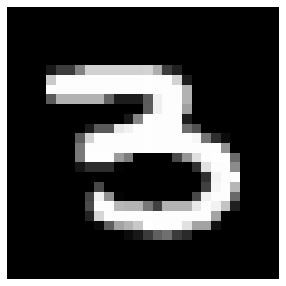

In [ ]:
img = x_test[51].reshape(1,28,28,1)
fig = plt.figure(figsize=(5,5))
plt.imshow(img[0,:,:,0],cmap="gray")
plt.axis('off')

In [ ]:
activations = activation_model.predict(img)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


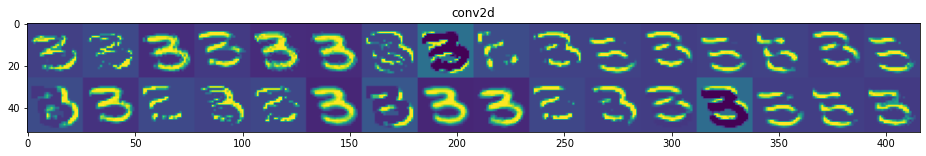

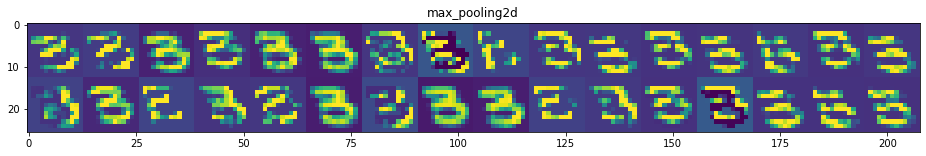

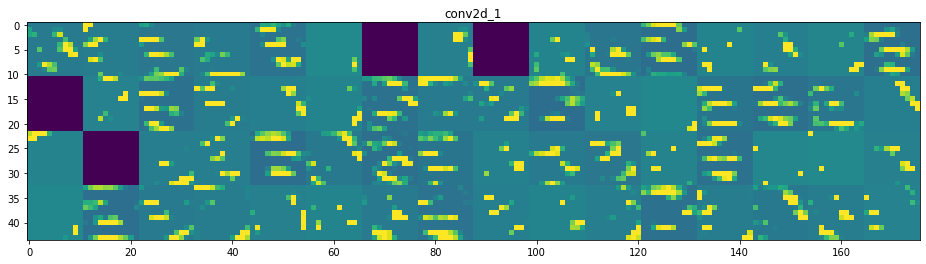

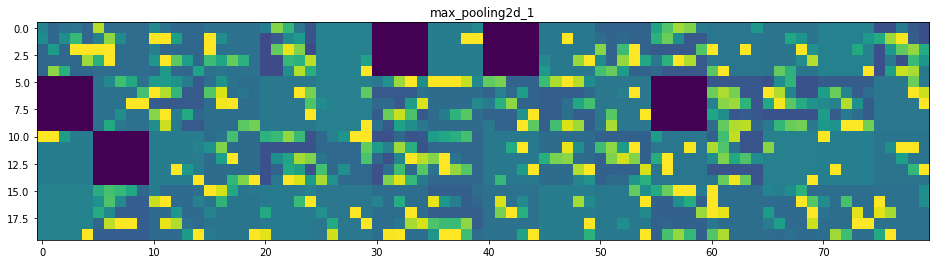

In [ ]:
layer_names = []
for layer in model.layers[0:4]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

# This first layer retains almost the full shape of the image, and also most of the information present in the image

# As we go deeper into the network we can see that the activations become more complex and abstract. It starts encoding high-level features such as edges, curves and angles.

# Also as we go deeper we can see that many of our filters are not getting activated, which shows our model is reaching it’s learning capacity.



